# Time Series Prediction


## Introduction

Predicting time series data is useful for a variety of business applications. Companies forecast time series data in order to forecast sales, manage their supply chains, and more.

LSTMs are commonly used for time series prediction because they are able to learn the underlying patterns of time series data. 

In this exercise, we will use an LSTM to forecast the data from a random timeseries by training it on the timeseries.

## Instructions

You can begin forecasting trends with LSTMs with the following steps:

1. Generate your timeseries data in Numpy
2. Load the data into PyTorch
3. Train your model on the data
4. Run the model to predict the next steps in the time series.

## Example Code

<b> Generate X, Y data </b>

In [1]:
# Create a sinusoidal dataset

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(1000)
Y = np.array([np.sin(x/10) + 0.01*x for x in X])

plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y vs X')
plt.show()

<b> Create an LSTM Model </b>

In [2]:
import torch
import torch.nn as nn

class LSTM(nn.Module):
    
    def __init__(self,input_size, hidden_size):
        super(LSTM, self).__init__()
        
        # The Modules to use
        self.hidden_size = hidden_size
        self.lstm = nn.LSTMCell(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, 999)
        
    def forward(self, x, hidden, cell):
        
        # get LSTM outputs
        hidden, cell = self.lstm(x, (hidden, cell))
        
        # get final output
        pred = self.fc(hidden)
        
        return pred, hidden, cell

### Training the LSTM

In [3]:
# hyperparameters
input_size = X.shape[0] - 1 # predict the next number
hidden_size = input_size

# instantiate a LSTM
lstm = LSTM(input_size, hidden_size)
print(lstm)

LSTM(
  (lstm): LSTMCell(999, 999)
  (fc): Linear(in_features=999, out_features=999, bias=True)
)


### Loss and Optimization

In [4]:
# MSE Loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.01)

### Defining the training function

In [5]:
# Train the LSTM
def train(lstm, X, Y, hidden_size, n_steps, print_every):
    
    # initialize the hidden state
    hidden = torch.zeros(1, hidden_size)
    cell = torch.zeros(1, hidden_size)
    
    x = X[:-1]
    y = Y[1:]
    
    for batch_i, step in enumerate(range(n_steps)):

        x_tensor = torch.from_numpy(x.reshape(1,-1)).float()
        y_tensor = torch.from_numpy(y.reshape(1,-1)).float()
        
        # hidden (n_layers, batch_size, hidden_dim)
        batch_size = 1
        hidden = torch.zeros(batch_size, hidden_size)
        cell = torch.zeros(batch_size, hidden_size)

        # outputs from the lstm
        prediction, hidden, cell = lstm(x_tensor, hidden, cell)
        
        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero_gradients
        optimizer.zero_grad()
        # perform backpropagation and update weights
        loss.backward()
        optimizer.step()
        
        if batch_i%print_every == 0:
            # display loss and predictions
            print('Loss: ', loss.item())
            plt.plot(x, y, 'r.') # input
            plt.plot(x, prediction.data.numpy().flatten(), 'b.') # prediction
            plt.show()
    
    return lstm
        

Loss:  33.78065872192383


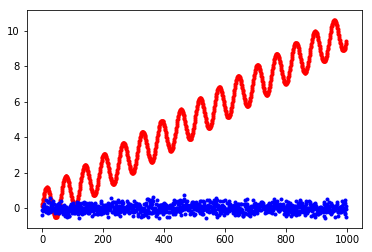

Loss:  2.125152349472046


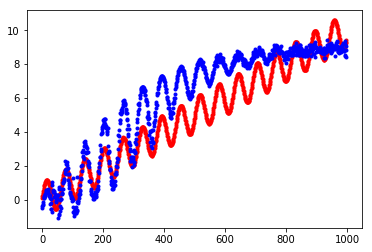

Loss:  4.627915859222412


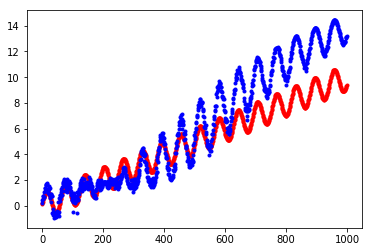

Loss:  1.223140001296997


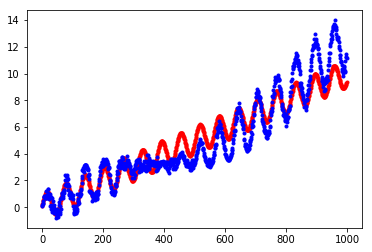

Loss:  1.1081279516220093


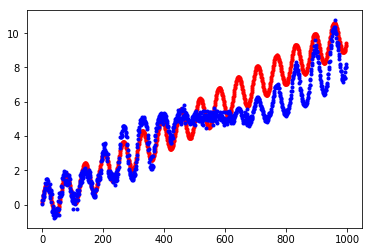

Loss:  0.7365854978561401


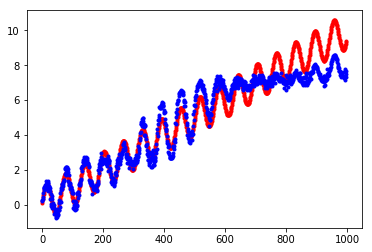

Loss:  0.312860369682312


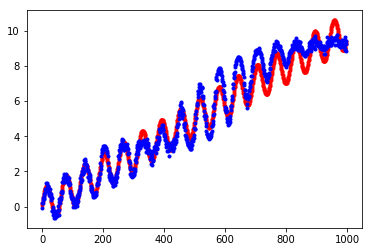

Loss:  0.27217328548431396


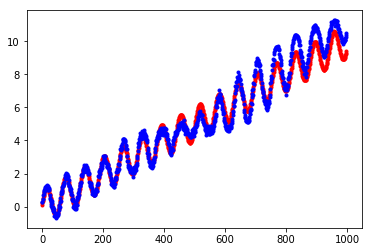

Loss:  0.13321147859096527


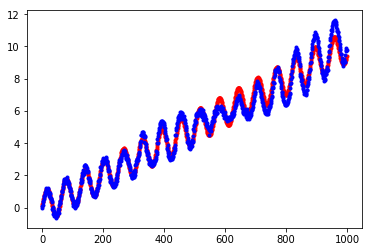

Loss:  0.0871814489364624


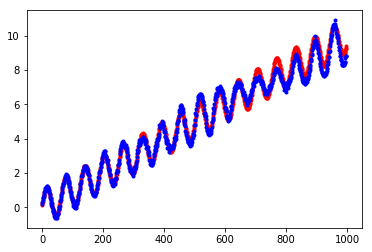

Loss:  0.05512773618102074


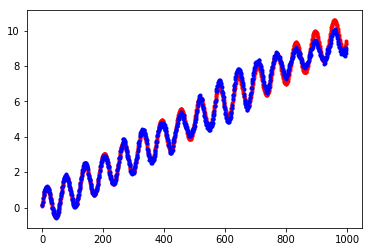

Loss:  0.029974699020385742


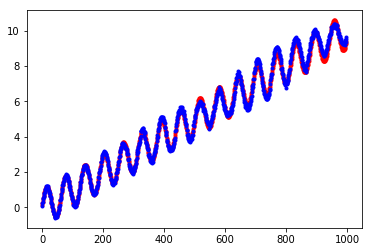

Loss:  0.020378636196255684


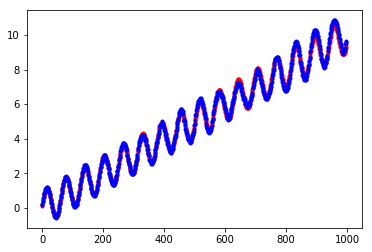

Loss:  0.010929234325885773


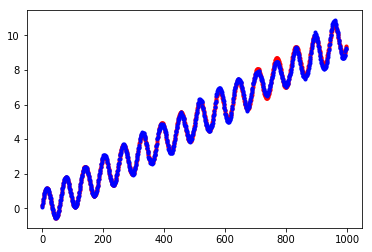

Loss:  0.00724237784743309


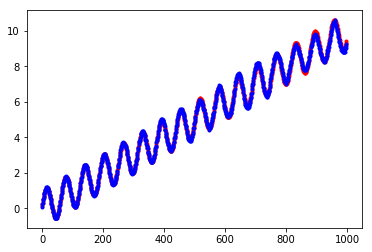

In [6]:
# train the lstm and monitor results
n_steps = 75
print_every = 5
hidden_size = 999

train_lstm = train(lstm, X, Y, hidden_size, n_steps, print_every)